<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Deep_Learning_using_Tensorflow/blob/main/C3_7_Predicting_next_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional

In [9]:
tokenizer=Tokenizer()
data="The UEFA Champions League \n (abbreviated as UCL) is an annual club football competition \n organised by the Union of European Football Associations (UEFA) and contested by top-division European clubs, deciding the competition winners through a group and knockout format. It is one of the most prestigious football tournaments in the world and the most prestigious club competition \n in European football, played by the national league champions (and, for some nations, one or more runners-up) of their national associations.The lowest point \n of italian football \n delivered a champions league"
corpus=data.lower().split("\n")

In [10]:
tokenizer.fit_on_texts(corpus)

In [11]:
total_words=len(tokenizer.word_index)+1

In [12]:
print(tokenizer.word_index)

{'the': 1, 'football': 2, 'of': 3, 'and': 4, 'champions': 5, 'league': 6, 'competition': 7, 'by': 8, 'european': 9, 'uefa': 10, 'is': 11, 'club': 12, 'associations': 13, 'a': 14, 'one': 15, 'most': 16, 'prestigious': 17, 'in': 18, 'national': 19, 'abbreviated': 20, 'as': 21, 'ucl': 22, 'an': 23, 'annual': 24, 'organised': 25, 'union': 26, 'contested': 27, 'top': 28, 'division': 29, 'clubs': 30, 'deciding': 31, 'winners': 32, 'through': 33, 'group': 34, 'knockout': 35, 'format': 36, 'it': 37, 'tournaments': 38, 'world': 39, 'played': 40, 'for': 41, 'some': 42, 'nations': 43, 'or': 44, 'more': 45, 'runners': 46, 'up': 47, 'their': 48, 'lowest': 49, 'point': 50, 'italian': 51, 'delivered': 52}


In [13]:
print(total_words)

53


In [14]:
input_sequences=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [16]:
max_sequence_len=max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding="pre"))

In [18]:
xs,labels=input_sequences[:,:-1],input_sequences[:,-1]

In [19]:
ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [24]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['of'])

18
1
3


In [27]:
xs[1],ys[1]

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 10], dtype=int32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.], dtype=float32))

In [28]:
model=Sequential([Embedding(total_words,64,input_length=max_sequence_len-1),
                  Bidirectional(LSTM(20)),
                  Dense(total_words,activation="relu"),
                  ])

In [29]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
3/3 [==============================] - 4s 28ms/step - loss: 9.7265 - accuracy: 0.0277
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 8.8194 - accuracy: 0.0238
Epoch 3/500
3/3 [==============================] - 0s 26ms/step - loss: 8.8476 - accuracy: 0.0099
Epoch 4/500
3/3 [==============================] - 0s 34ms/step - loss: 7.8938 - accuracy: 0.0060
Epoch 5/500
3/3 [==============================] - 0s 27ms/step - loss: 8.0563 - accuracy: 0.0099
Epoch 6/500
3/3 [==============================] - 0s 27ms/step - loss: 8.2759 - accuracy: 0.0238
Epoch 7/500
3/3 [==============================] - 0s 29ms/step - loss: 8.9149 - accuracy: 0.0337
Epoch 8/500
3/3 [==============================] - 0s 28ms/step - loss: 8.2461 - accuracy: 0.0337
Epoch 9/500
3/3 [==============================] - 0s 34ms/step - loss: 8.1645 - accuracy: 0.0376
Epoch 10/500
3/3 [==============================] - 0s 27ms/step - loss: 8.2620 - accuracy: 0.0376
Epoch 11/500
3/3 [=

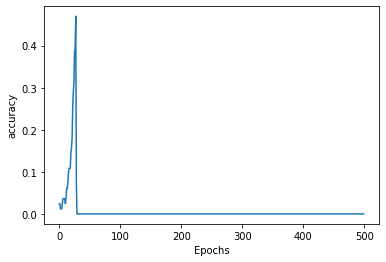

In [31]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [40]:
seed_text = "the european cup is"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


the european cup is                                                                                                    


In [35]:
predicted

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)